# Example Design for a 201 pt

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import empymod as epm

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

### Parameters for all data

In [3]:
fI0 = epm.fdesign.j0_1(5)
fI1 = epm.fdesign.j1_1(5)
r = np.logspace(0, 10, 1000)
r_def = (1, 1, 2)
verb = 2
plot = 0
save = True
full_output = True
fI = (fI0, fI1)
filt, out = epm.fdesign.load_filter('wer201', True)

## Create or load data with different # pts

In [4]:
inpp = {'r': r, 'r_def': r_def,
        'verb': verb, 'plot': plot, 'save': save,
        'full_output': full_output, 'fI': fI,
        'spacing': (0.005, 0.8, 50),  # Same spacing for all three plots 101/201/401
        'shift': (-9, 3, 50)}         # Same shift for all three plots 101/201/401

try:
    filt2p, out2p = epm.fdesign.load_filter('t101', True)
    filt3p, out3p = epm.fdesign.load_filter('t201', True)
    filt4p, out4p = epm.fdesign.load_filter('t401', True)
except:
    filt2p, out2p = epm.fdesign.design(n=101, name='t101', **inpp)
    filt3p, out3p = epm.fdesign.design(n=201, name='t201', **inpp)
    filt4p, out4p = epm.fdesign.design(n=401, name='t401', **inpp)

## Create or load data for 201 pt different zoom levels

In [5]:
inpz = {'r': r, 'r_def': r_def,
        'verb': verb, 'plot': plot, 'save': save,
        'full_output': full_output, 'fI': fI,
        'n': 201}  # Same filtel length for all zoom leves

try:
    filt1z, out1z = epm.fdesign.load_filter('201-1', True)
    filt2z, out2z = epm.fdesign.load_filter('201-2', True)
    filt3z, out3z = epm.fdesign.load_filter('201-3', True)
    filt4z, out4z = epm.fdesign.load_filter('201-4', True)
except:
    filt1z, out1z = epm.fdesign.design(spacing=(0.01, 0.2, 50), shift=(-4, 0, 50), name='201-1', **inpz)
    filt2z, out2z = epm.fdesign.design(spacing=(0.047, 0.08, 50), shift=(-2.4, -0.75, 50), name='201-2', **inpz)
    filt3z, out3z = epm.fdesign.design(spacing=(0.0575, 0.0675, 200), shift=(-1.5, -1.15, 200), name='201-3', **inpz)
    filt4z, out4z = epm.fdesign.design(spacing=(0.0605, 0.061, 100), shift=(-1.31, -1.29, 100), name='201-4', **inpz)

## Figure for 101, 201, and 401 points

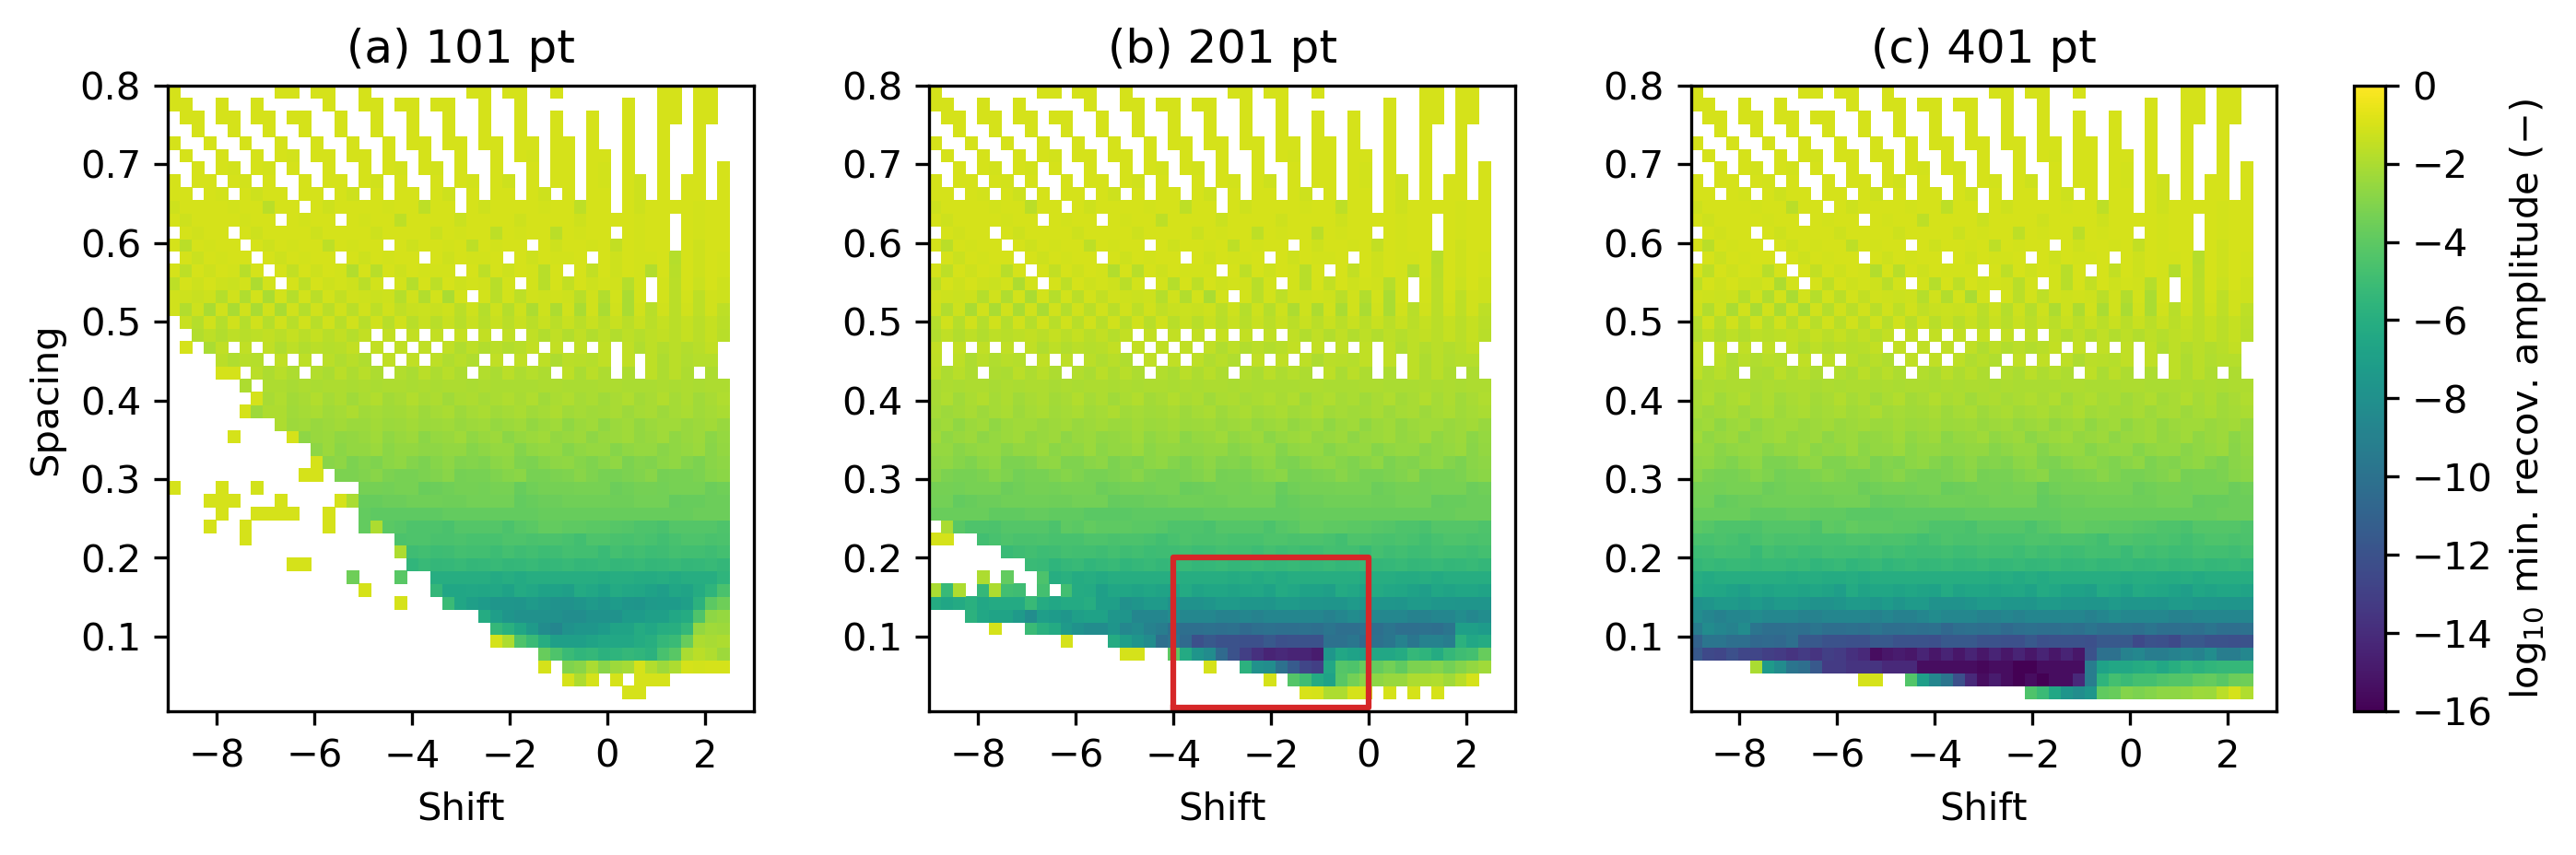

In [6]:
def plot_out(out, out2=False):
    
    # plot `out`
    cf = plt.pcolormesh(out[2][1, 0, :], out[2][0, :, 0], np.log10(out[3]),
                        linewidth=0, rasterized=True, vmin=-16, vmax=0)

    # Draw a red square if `out2` is provided
    if out2:
        minx, maxx = out2[2][1, 0, 0], out2[2][1, 0, -1]
        miny, maxy = out2[2][0, 0, 0], out2[2][0, -1, 0]
        plt.plot([minx, minx, maxx, maxx, minx], [miny, maxy, maxy, miny, miny], 'C3')
    
    # Xlabel and ticks
    plt.xlabel('Shift')
    plt.xticks([-8, -6, -4, -2, 0, 2])
    
    return cf
    
# Create figure
fig, axs = plt.subplots(figsize=(12, 3), nrows=1, ncols=3)
axs = axs.ravel()
plt.subplots_adjust(wspace=0.3)

# (a) 101 pt
plt.sca(axs[0])
plt.ylabel('Spacing')
plt.title('(a) 101 pt')
plot_out(out2p)

# (b) 201 pt
plt.sca(axs[1])
plt.title('(b) 201 pt')
plot_out(out3p, out1z)

# (c) 401 pt
plt.sca(axs[2])
plt.title('(c) 401 pt')
cf = plot_out(out4p)

# Plot combined colorbar
cax, kw = plt.matplotlib.colorbar.make_axes(axs, location='right', pad=0.03)
cb = plt.colorbar(cf, cax=cax, **kw)
cb.set_label(r'$\log_{10}$ min. recov. amplitude $(-)$')

# Save and show plot
for ending in ['png', 'pdf', 'eps']:
    plt.savefig('../figures/Figure-2.'+ending, bbox_inches='tight')
plt.show()

## Figure for 201 points with different zooms

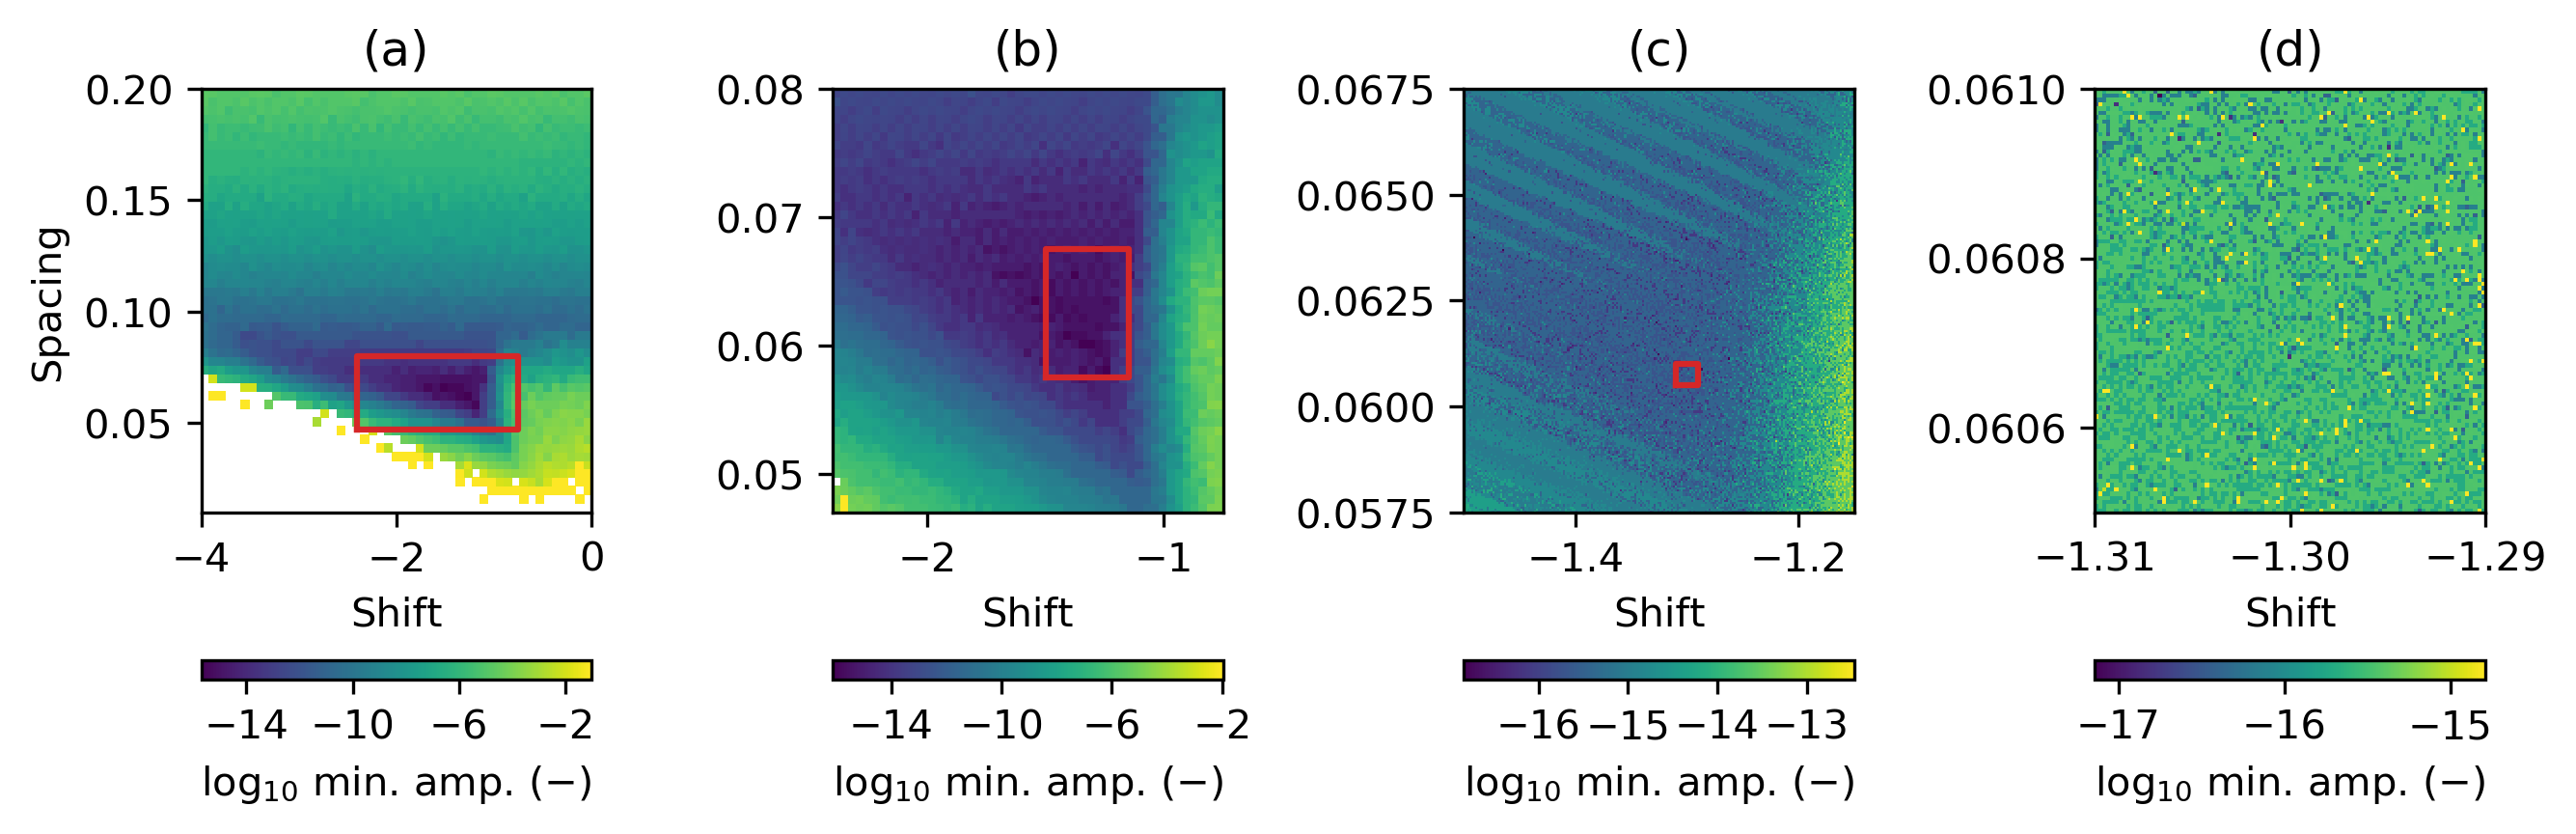

In [7]:
def plot_out(out, out2=False):
    
    # plot `out`
    plt.pcolormesh(out[2][1, 0, :], out[2][0, :, 0], np.log10(out[3]),
                   linewidth=0, rasterized=True)
    
    # Draw a red square if `out2` is provided
    if out2:
        minx, maxx = out2[2][1, 0, 0], out2[2][1, 0, -1]
        miny, maxy = out2[2][0, 0, 0], out2[2][0, -1, 0]
        plt.plot([minx, minx, maxx, maxx, minx], [miny, maxy, maxy, miny, miny], 'C3')
    
    # Xlabel
    plt.xlabel('Shift')

    # Colorbar
    if np.max(np.log10(out[3])) > 1e-12:
        ticks = [-14, -10, -6, -2]
    else:
        ticks = [-17, -16, -15, -14, -13]
    cb = plt.colorbar(ticks=ticks, orientation='horizontal', pad=0.22)
    cb.set_label(r'$\log_{10}$ min. amp. $(-)$')
    
# Create figure
fig, axs = plt.subplots(figsize=(9, 3), nrows=1, ncols=4)
axs = axs.ravel()

# (a) Overview
plt.sca(axs[0])
plt.title('(a)')
plt.ylabel('Spacing')
plot_out(out1z, out2z)

# (b) First zoom
plt.sca(axs[1])
plt.title('(b)')
plot_out(out2z, out3z)

# (c) Detail
plt.sca(axs[2])
plt.title('(c)')
plot_out(out3z, out4z)

# (d) Very detailed
plt.sca(axs[3])
plt.title('(d)')
plot_out(out4z)

plt.tight_layout()

# Save and show plot
for ending in ['png', 'pdf', 'eps']:
    plt.savefig('../figures/Figure-3.'+ending, bbox_inches='tight')
plt.show()

## Figure of filter and best result

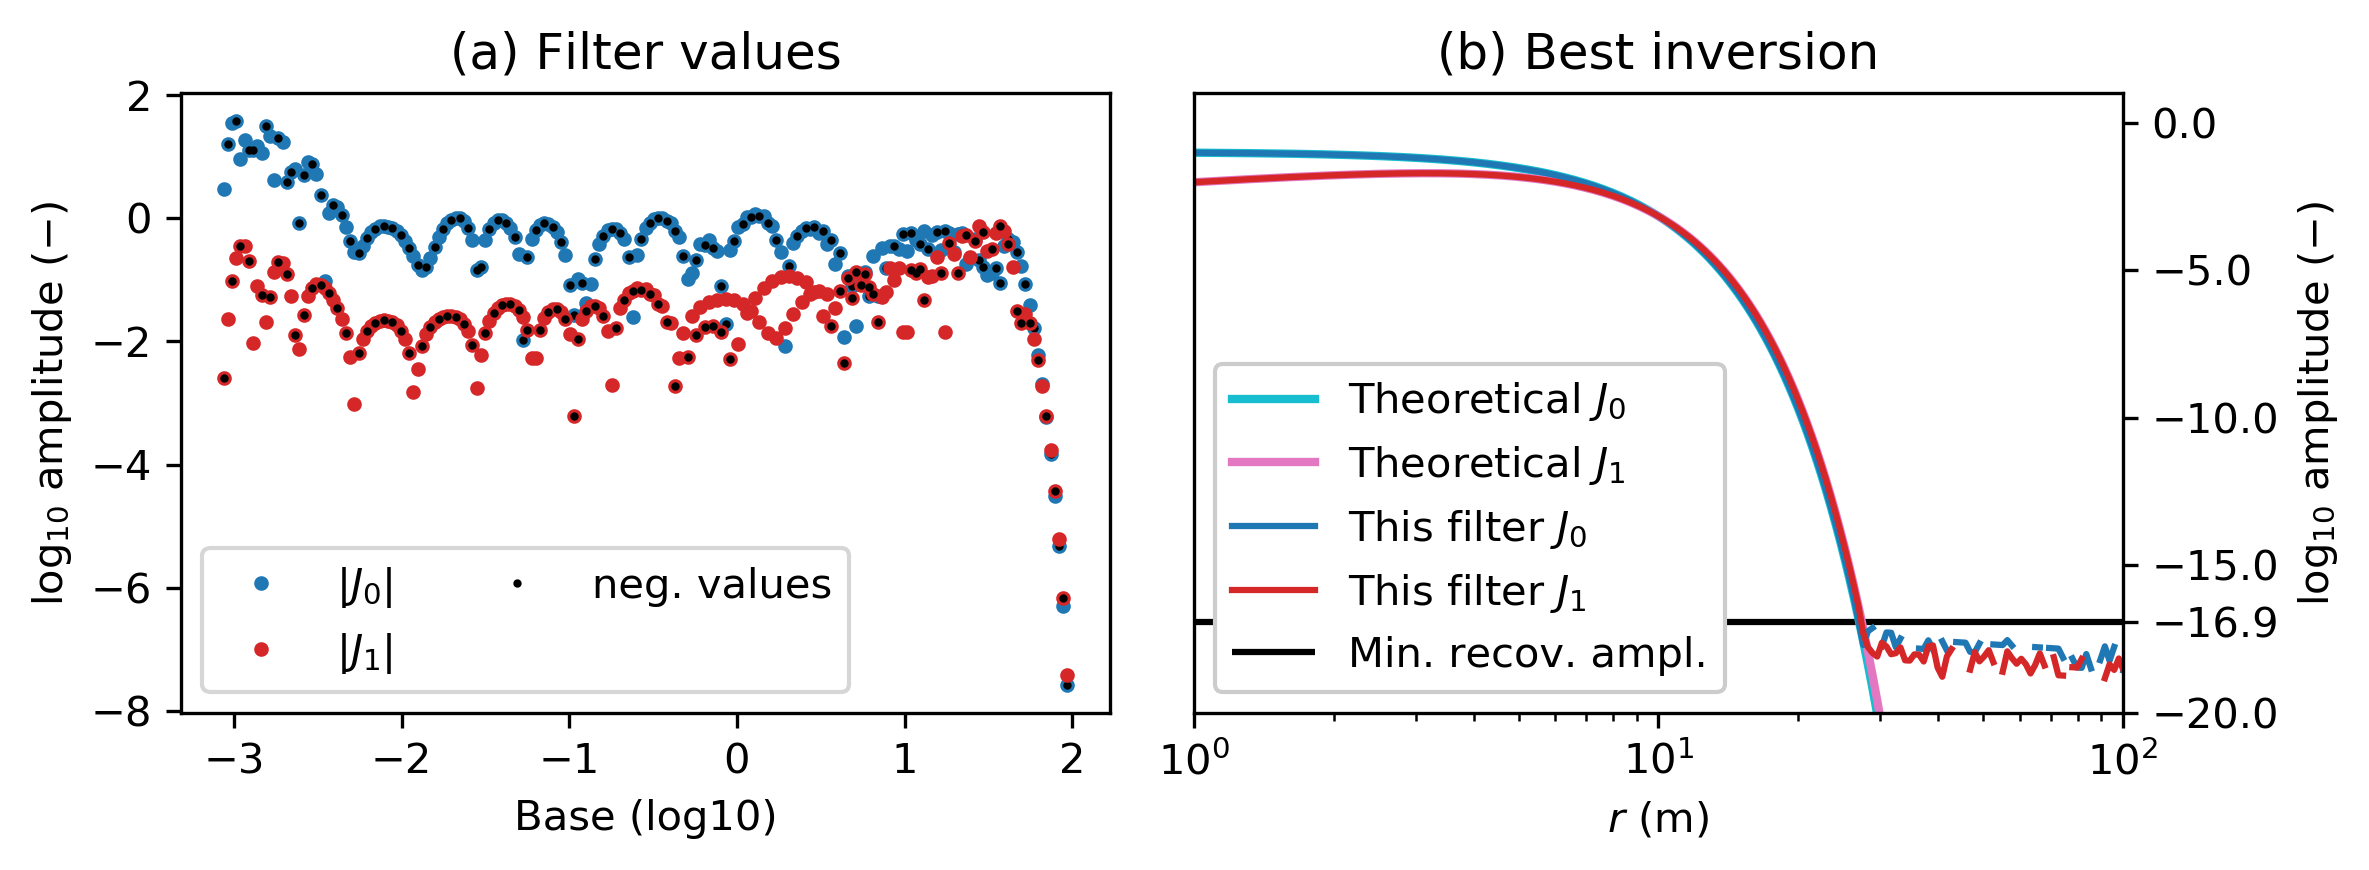

In [8]:
plt.figure(figsize=(8, 3))
plt.subplots_adjust(wspace=0.1)

# (a) Filter values
plt.subplot(121)
plt.title('(a) Filter values')

# J0
plt.plot(np.log10(filt.base), np.log10(np.abs(filt.j0)),
         'C0.', lw=.5, ms=5,  label=r'$|J_0|$')
plt.plot(np.log10(filt.base), np.log10(-filt.j0), 'k.', ms=2)
# J1
plt.plot(np.log10(filt.base), np.log10(np.abs(filt.j1)),
         'C3.', lw=.5, ms=5,  label=r'$|J_1|$')
plt.plot(np.log10(filt.base), np.log10(-filt.j1),
         'k.', ms=2,  label='neg. values')


plt.xlabel('Base (log10)')
plt.ylabel('$\log_{10}$ amplitude ($-$)')
plt.legend(loc=3, ncol=2)


# (b) Plot rhs
ax = plt.subplot(122)
plt.title('(b) Best inversion')

# Transform pair rhs
plt.semilogx(r, np.log10(np.abs(fI0.rhs(r))), 'C9', lw=2, label='Theoretical $J_0$')
plt.semilogx(r, np.log10(np.abs(fI1.rhs(r))), 'C6', lw=2, label='Theoretical $J_1$')

# Calculate rhs-response with this filter
k = filt.base/r[:, None]
rhs0 = np.dot(fI0.lhs(k), filt.j0)/r
rhs1 = np.dot(fI1.lhs(k), filt.j1)/r

# Transform with filter
plt.semilogx(r, np.log10(np.abs(rhs0)), 'C0', lw=1.5, label=r'This filter $J_0$')
plt.semilogx(r, np.log10(np.abs(rhs1)), 'C3', lw=1.5, label=r'This filter $J_1$')
plt.hlines(np.log10(out[1]), 1e0, 1e2, label='Min. recov. ampl.')

plt.ylim([-20, 1])
plt.xlim([1e0, 1e2])
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.ylabel('$\log_{10}$ amplitude ($-$)')
plt.xlabel(r'$r$ (m)')
plt.yticks([0, -5, -10, -15, np.log10(out[1]), -20])
plt.legend(loc=3, ncol=1, framealpha=1)

plt.tight_layout()
# Save and show plot
for ending in ['png', 'pdf', 'eps']:
    plt.savefig('../figures/Figure-4.'+ending, bbox_inches='tight')
plt.show()

In [9]:
epm.versions('HTML')